<a href="https://colab.research.google.com/github/kiaerii/lalab1.ponedelnik/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22lab3_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение
Базовая статистика для начинающих
* [Гистограмма](#1)
* [Выбросы](#2)
* [Ящик с усами](#3)
* [Сводная статистика](#4)
* [CDF](#5)
* [Размер эффекта](#6)
* [Взаимосвязь между переменными](#7)
* [Корреляция](#8)
* [Ковариация](#9)
* [Коэффициент корреляции Пирсона](#10)
* [Ранговая корреляция Спирмена](#11)
* [Среднее против медианы](#12)
* [Проверка гипотез](#13)
* [Нормальное (Гауссовское) распределение и z-оценка](#14)



### Датасет
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data



In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in
#! pip install pandas.tools
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import plotting
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [9]:
import pandas as pd

data = pd.read_csv("/content/data.csv")

# удаляем ненужные столбцы
data = data.drop(['Unnamed: 32','id'], axis=1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Задание 1 кратко методами pandas проаннализируйте датасет

In [10]:
print("\n1. Основная информация о датасете:")
print(f"Размер датасета: {data.shape}")
print(f"Количество строк: {data.shape[0]}")
print(f"Количество столбцов: {data.shape[1]}")
print("\n2. Первые 5 строк:")
print(data.head())
print("\n3. Информация о типах данных:")
print(data.info())
print("\n4. Статистическое описание числовых признаков:")
print(data.describe())
print("\n5. Проверка на пропущенные значения:")
print(data.isnull().sum())
print("\n6. Распределение целевой переменной (diagnosis):")
print(data['diagnosis'].value_counts())
print(data['diagnosis'].value_counts(normalize=True))
print("\n7. Корреляция признаков с целевой переменной:")
numeric_data = data.select_dtypes(include=[np.number])
correlations = numeric_data.corrwith(data['diagnosis'].map({'M':1, 'B':0}))
print(correlations.sort_values(ascending=False).head(10))


1. Основная информация о датасете:
Размер датасета: (569, 31)
Количество строк: 569
Количество столбцов: 31

2. Первые 5 строк:
  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.104


## Гистограмма
* Сколько раз каждое значение появляется в наборе данных. Это описание называется распределением переменной.
* Наиболее распространенный способ представления распределения переменной - гистограмма, которая представляет собой график, показывающий частоту каждого значения.
* Частота = количество раз, которое каждое значение появляется
* Пример: [1,1,1,1,2,2,2]. Частота 1 равна четырем, а частота 2 равна трем.


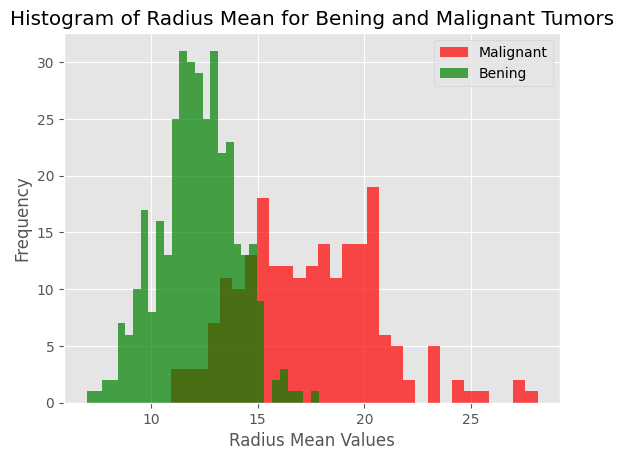

Most frequent malignant radius mean is:  20.101999999999997


In [12]:
m = plt.hist(data[data["diagnosis"] == "M"].radius_mean,bins=30,fc = 'red',alpha=0.7,color='red',label = "Malignant")
b = plt.hist(data[data["diagnosis"] == "B"].radius_mean,bins=30,fc = 'green',alpha=0.7,color='green',label = "Bening")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()
frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]
print("Most frequent malignant radius mean is: ",most_frequent_malignant_radius_mean)

* Давайте посмотрим на другие выводы
* Из этого графика видно, что средний радиус злокачественных опухолей в основном больше, чем средний радиус доброкачественных опухолей.
* Распределение доброкачественных опухолей (зеленый на графике) имеет приблизительно колоколообразную форму, что является формой нормального распределения (гауссовского распределения).
* Также вы можете найти такой результат, как наиболее частый средний радиус злокачественных опухолей.



## Выбросы
* При просмотре гистограммы видно, что в распределении доброкачественных опухолей (зеленый на графике) есть редкие значения.
* Эти значения могут быть ошибками или редкими событиями.
* Эти ошибки и редкие события можно назвать выбросами.
* Расчет выбросов:
  * сначала нужно рассчитать первый квартиль (Q1)(25%)
  * затем найти IQR (межквартильный размах) = Q3-Q1
  * наконец, вычислить Q1 - 1.5*IQR и Q3 + 1.5*IQR
  * Все, что находится за пределами этого диапазона, является выбросом.
  * давайте напишем код для распределения доброкачественной опухоли по признаку среднего радиуса


In [15]:
data_bening = data[data["diagnosis"] == "B"]
data_malignant = data[data["diagnosis"] == "M"]
desc = data_bening.radius_mean.describe()

Q1 = desc["25%"]
Q3 = desc["75%"]
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
print(f"Q1 (25%): {Q1}")
print(f"Q3 (75%): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

outliers = data_bening[(data_bening.radius_mean < lower_bound) |(data_bening.radius_mean > upper_bound)].radius_mean.values
print("Outliers:", outliers)

Anything outside this range is an outlier: ( 7.645000000000001 , 16.805 )
Q1 (25%): 11.08
Q3 (75%): 13.37
IQR: 2.289999999999999
Lower bound: 7.645000000000001
Upper bound: 16.805
Outliers: [ 6.981 16.84  17.85 ]



## Ящик с усами
* Вы также можете увидеть выбросы на ящиковых диаграммах.
* Мы нашли 3 выброса в среднем радиусе доброкачественных опухолей, и на ящиковой диаграмме есть 3 выброса.


     diagnosis      variable  value
0            M   radius_mean  17.99
1            M   radius_mean  20.57
2            M   radius_mean  19.69
3            M   radius_mean  11.42
4            M   radius_mean  20.29
...        ...           ...    ...
1133         M  texture_mean  22.39
1134         M  texture_mean  28.25
1135         M  texture_mean  28.08
1136         M  texture_mean  29.33
1137         B  texture_mean  24.54

[1138 rows x 3 columns]


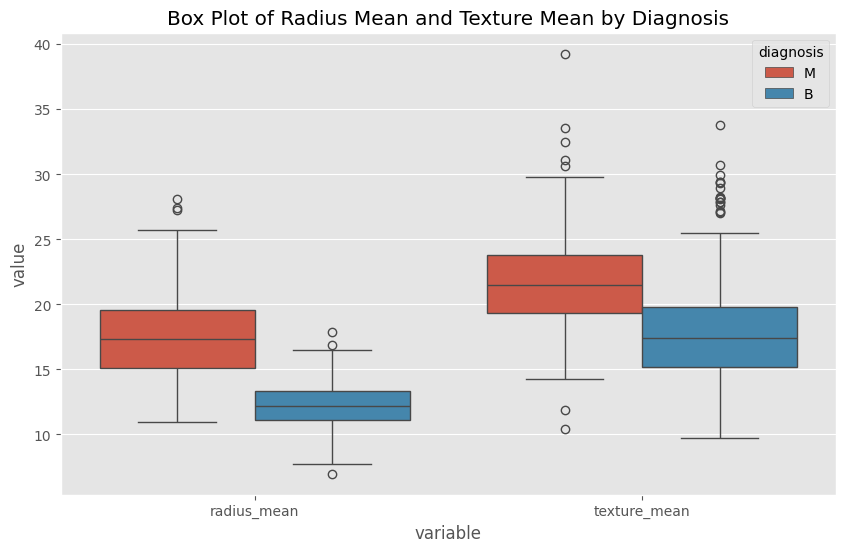

In [19]:
melted_data = pd.melt(data,id_vars = "diagnosis",value_vars = ['radius_mean', 'texture_mean'])
print(melted_data)

plt.figure(figsize=(10, 6))
melted_data = pd.melt(data, id_vars="diagnosis", value_vars=['radius_mean', 'texture_mean'])
sns.boxplot(x='variable', y='value', hue='diagnosis', data=melted_data)
plt.title('Box Plot of Radius Mean and Texture Mean by Diagnosis')
plt.show()


## Сводная статистика
* Среднее значение
* Дисперсия: разброс распределения
* Стандартное отклонение: квадратный корень из дисперсии
* Давайте посмотрим на сводную статистику среднего радиуса доброкачественных опухолей.


In [20]:
print("mean: ",data_bening.radius_mean.mean())
print("variance: ",data_bening.radius_mean.var())
print("standart deviation (std): ",data_bening.radius_mean.std())
print("describe method: ",data_bening.radius_mean.describe())

mean:  12.146523809523808
variance:  3.170221722043872
standart deviation (std):  1.7805116461410389
describe method:  count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


<a id="5"></a> <br>
## CDF
Интегральная функция распределения (Cumulative distribution function, CDF) — это вероятность того, что случайная переменная примет значение, меньшее или равное x. Формула: P(X <= x).
Давайте объясним это на примере графика CDF для среднего радиуса доброкачественных опухолей.
На графике мы можем задать вопрос: какова вероятность, что средний радиус будет меньше или равен 12? Ответ — 0.5. Это означает, что вероятность того, что переменная (средний радиус) примет значение 12 или меньше, составляет 0.5.
Построить график CDF можно двумя разными способами.

**Задание:** Постройте график интегральной функции распределения (CDF) для среднего радиуса доброкачественных опухолей.

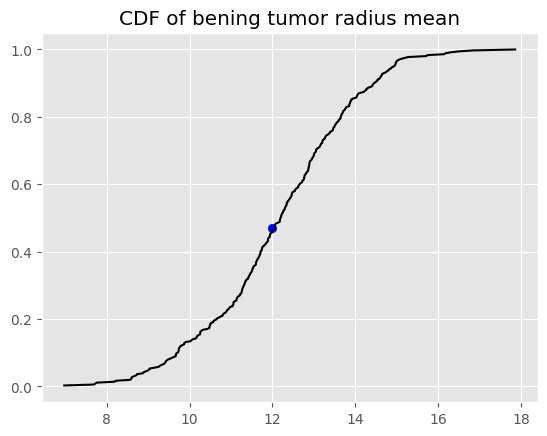

In [25]:
sorted_data = np.sort(data_bening.radius_mean)
y = np.arange(1, len(sorted_data)+1)/len(sorted_data)
plt.plot(sorted_data,y,color='black')
plt.title('CDF of bening tumor radius mean')
plt.scatter(12.0,0.47, color='blue',)
plt.show()


## Размер эффекта
* Одна из сводных статистик.
* Она описывает размер эффекта. Это простой способ количественной оценки различия между двумя группами.
* Другими словами, размер эффекта подчеркивает размер различия.
* Используйте размер эффекта Коэна.
* Коэн предполагает, что если d (размер эффекта) = 0.2, это маленький размер эффекта, d = 0.5 - средний размер эффекта, d = 0.8 - большой размер эффекта.
* Давайте сравним размер эффекта между средним радиусом доброкачественных опухолей и средним радиусом злокачественных опухолей.
* Размер эффекта равен 2.2, что слишком велико и говорит о том, что две группы отличаются друг от друга, как мы и ожидали. Потому что наши группы - это средний радиус доброкачественных опухолей и средний радиус злокачественных опухолей, которые отличаются друг от друга.


In [27]:
#d = (средний_радиус_злокачественных - средний_радиус_доброкачественных) / объединенное_стандартное_отклонение
meanr_m = data_malignant.radius_mean.mean()
meanr_b = data_bening.radius_mean.mean()

std_m = data_malignant.radius_mean.std()
std_b = data_bening.radius_mean.std()
s_pooled = np.sqrt((std_m**2 + std_b**2) / 2)

d = (meanr_m - meanr_b) / s_pooled
print("M vs B:", d)

M vs B: 2.0511414795444525



## Взаимосвязь между переменными
* Мы можем сказать, что две переменные связаны друг с другом, если одна из них дает информацию о других.
* Например, цена и расстояние. Если вы едете на такси на большое расстояние, вы заплатите больше. Поэтому мы можем сказать, что цена и расстояние положительно связаны друг с другом.
* Диаграмма рассеяния
* Самый простой способ проверить взаимосвязь между двумя переменными.
* Давайте посмотрим на взаимосвязь между средним радиусом и средней площадью.
* На диаграмме рассеяния видно, что при увеличении среднего радиуса увеличивается и средняя площадь. Следовательно, они положительно коррелируют друг с другом.
* Нет корреляции между средней площадью и фрактальной размерностью se. Потому что при изменении средней площади фрактальная размерность se не зависит от изменения средней площади.


<Figure size 1500x1000 with 0 Axes>

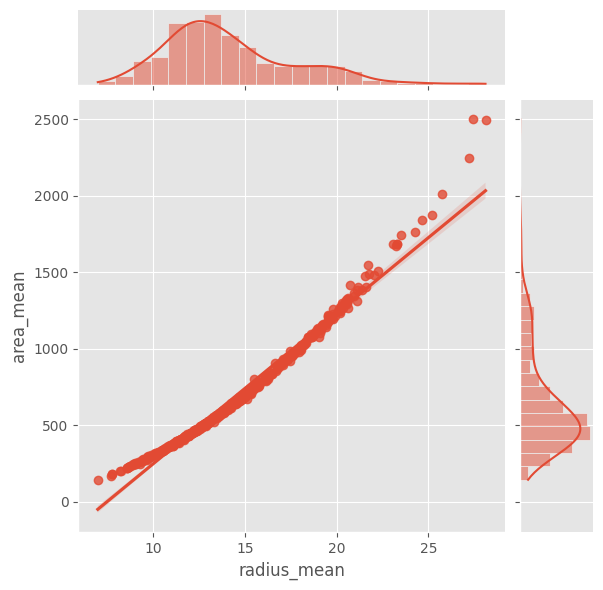

In [28]:
plt.figure(figsize = (15,10))
sns.jointplot(x="radius_mean", y="area_mean", data=data, kind="reg")
plt.show()

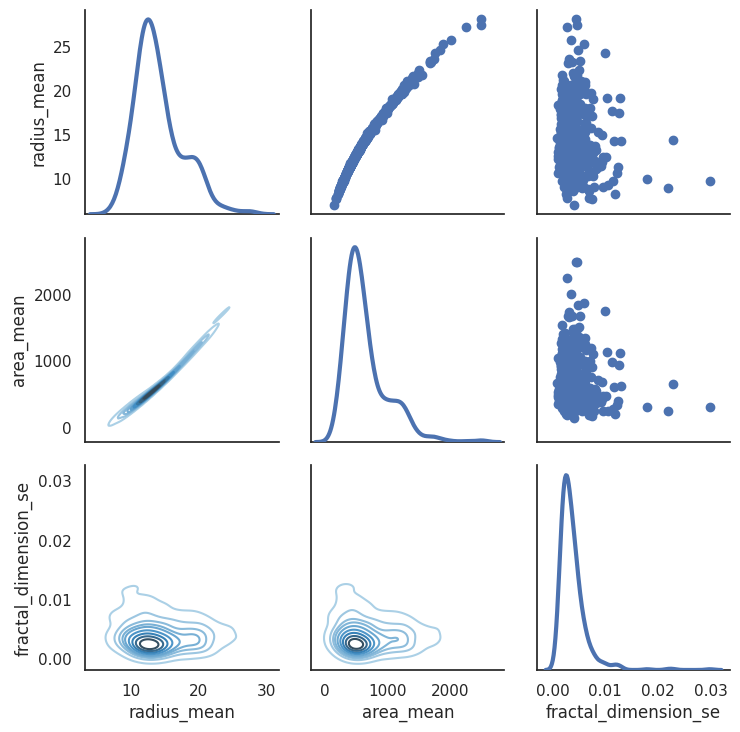

In [29]:
# Also we can look relationship between more than 2 distribution
sns.set(style = "white")
df = data.loc[:,["radius_mean","area_mean","fractal_dimension_se"]]
g = sns.PairGrid(df,diag_sharey = False,)
g.map_lower(sns.kdeplot,cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw =3)
plt.show()


## Корреляция
* Сила взаимосвязи между двумя переменными.
* Давайте посмотрим на корреляцию между всеми признаками.



=== Корреляционная матрица ===


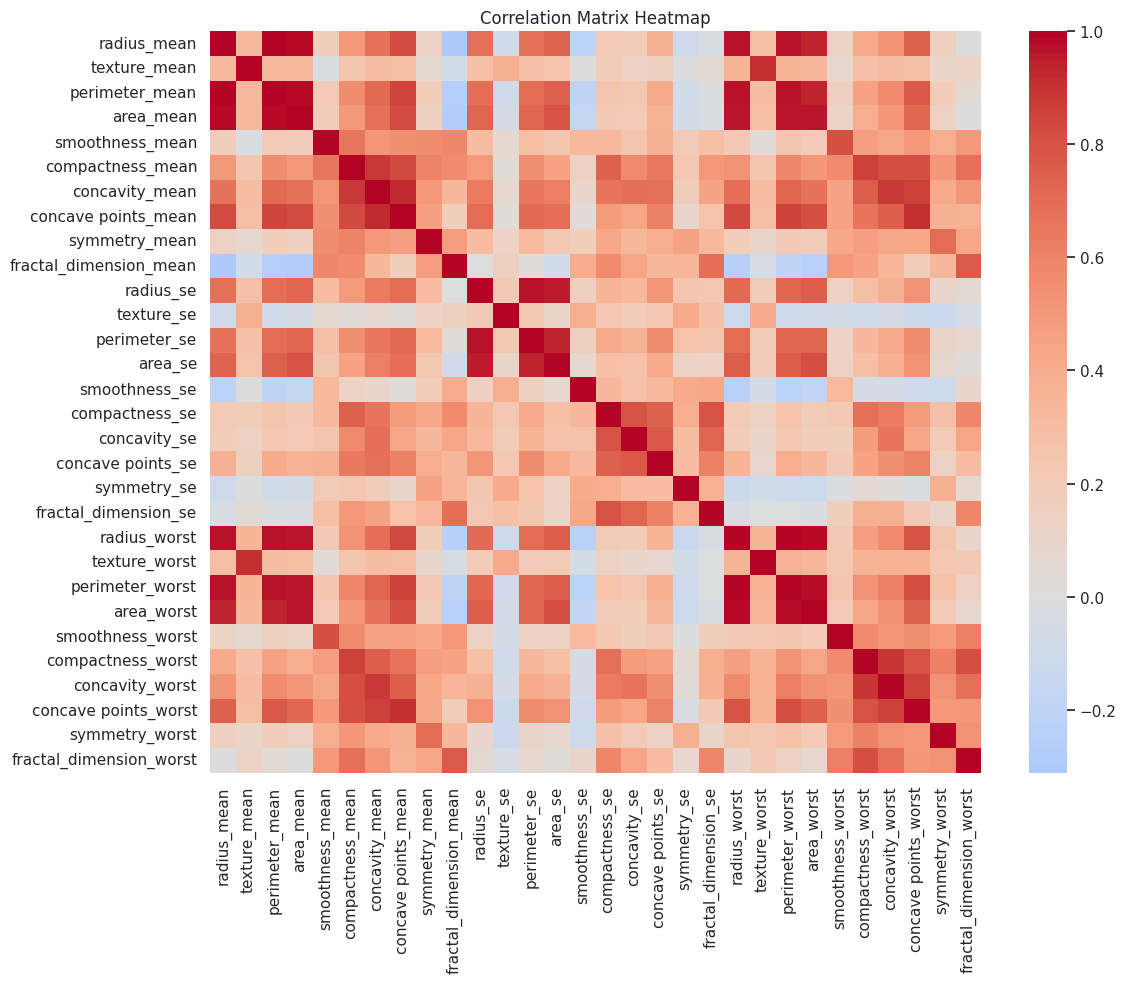


Наиболее коррелированные признаки с radius_mean:
radius_mean             1.000000
perimeter_mean          0.997855
area_mean               0.987357
radius_worst            0.969539
perimeter_worst         0.965137
area_worst              0.941082
concave points_mean     0.822529
concave points_worst    0.744214
area_se                 0.735864
radius_se               0.679090
Name: radius_mean, dtype: float64


In [32]:
print("\n=== Корреляционная матрица ===")
plt.figure(figsize=(12, 10))
correlation_matrix = data.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# Наиболее коррелированные признаки с radius_mean
print("\nНаиболее коррелированные признаки с radius_mean:")
corr_with_radius = correlation_matrix['radius_mean'].sort_values(ascending=False)
print(corr_with_radius.head(10))


## Ковариация
* Ковариация - это мера тенденции двух переменных изменяться вместе.
* Таким образом, ковариация максимальна, если два вектора идентичны.
* Ковариация равна нулю, если они ортогональны.
* Ковариация отрицательна, если они направлены в противоположные стороны.
* Давайте посмотрим на ковариацию между средним радиусом и средней площадью. Затем посмотрим на средний радиус и фрактальную размерность se.


In [39]:
print('ковариация между средним радиусом и средней площадью:', np.cov(data.radius_mean, data.area_mean)[0,1]) #x,y
print('средний радиус и фрактальную размерность se', np.cov(data.radius_mean, data.fractal_dimension_se)[0, 1])
print('\n')
print('ковариация между средним радиусом и средней площадью(B):', np.cov(data_bening.radius_mean, data_bening.area_mean)[0,1])
print('средний радиус и фрактальную размерность se(B):', np.cov(data_bening.area_mean, data_bening.fractal_dimension_se)[0,1])

print('ковариацию между средним радиусом и средней площадью(M):', np.cov(data_malignant.radius_mean, data_malignant.area_mean)[0,1])
print('средний радиус и фрактальную размерность se(M):', np.cov(data_malignant.area_mean, data_malignant.fractal_dimension_se)[0,1])

ковариация между средним радиусом и средней площадью: 1224.483409346457
средний радиус и фрактальную размерность se -0.0003976248576440629


ковариация между средним радиусом и средней площадью(B): 237.76916020599262
средний радиус и фрактальную размерность se(B): -0.09598343326007933
ковариацию между средним радиусом и средней площадью(M): 1167.16650308504
средний радиус и фрактальную размерность se(M): -0.026481123562550297



## Коэффициент корреляции Пирсона
* Частное от деления ковариации на стандартное отклонение переменных.
* Давайте посмотрим на коэффициент корреляции Пирсона между средним радиусом и средней площадью.
* Сначала давайте используем метод .corr(), который мы фактически использовали в части корреляции. В части корреляции мы фактически использовали коэффициент корреляции Пирсона :)
* p1 и p2 одинаковы. В p1 мы используем метод corr(), в p2 мы применяем определение коэффициента корреляции Пирсона (cov(A,B)/(std(A)*std(B)))
* Как мы и ожидали, коэффициент корреляции Пирсона между средней площадью и средней площадью равен 1, что означает, что они имеют одинаковое распределение.
* Также коэффициент корреляции Пирсона между средней площадью и средним радиусом равен 0.98, что означает, что они положительно коррелируют друг с другом, и взаимосвязь между ними очень высока.
* Чтобы было понятнее, то, что мы делали в части корреляции и в части коэффициента корреляции Пирсона, одно и то же.


In [40]:
#коэффициент корреляции Пирсона между средним радиусом и средней площадью
p1 = data["radius_mean"].corr(data["area_mean"])
print(p1)

cov_ra = np.cov(data.radius_mean, data.area_mean)[0, 1]
std_r = data.radius_mean.std()
std_a = data.area_mean.std()
p2= cov_ra/(std_r * std_a)
print(p2)

0.9873571700566127
0.9873571700566132



## Ранговая корреляция Спирмена
* Коэффициент корреляции Пирсона хорошо работает, если взаимосвязь между переменными линейна и переменные примерно нормальны. Но он не устойчив, если есть выбросы.
* Для вычисления корреляции Спирмена нам нужно вычислить ранг каждого значения.


In [48]:
ranked_data = data.rank()
spearman_corr = ranked_data["radius_mean"].corr(ranked_data["area_mean"])
pearson_corr = data["radius_mean"].corr(data["area_mean"])

print('Сравнение')
print('Спирмен',spearman_corr)
print('Пирсон', pearson_corr)

Сравнение
Спирмен 0.9996020278067481
Пирсон 0.9873571700566127


* Корреляция Спирмена немного выше, чем корреляция Пирсона.
  * Если взаимосвязь между распределениями нелинейна, корреляция Спирмена, как правило, лучше оценивает силу взаимосвязи.
  * Коэффициент корреляции Пирсона может быть подвержен влиянию выбросов. Корреляция Спирмена более устойчива.



## Среднее против медианы
* Иногда вместо среднего значения нам нужно использовать медиану. Я объясню, почему нам нужно использовать медиану, на примере.
* Давайте представим, что в компании работают 10 человек. Начальник компании повысит им зарплату, если среднее значение их зарплаты меньше 5.


In [49]:
salary = [1,4,3,2,5,4,2,3,1,500]
print("Mean of salary: ",np.mean(salary))

Mean of salary:  52.5


* Среднее значение зарплаты составляет 52.5, поэтому начальник думает, что он слишком много платит своим сотрудникам. И не повышает им зарплату. Однако, как вы знаете, это несправедливо, и 500 (зарплата) является выбросом для этого списка зарплат.
* Медиана избегает выбросов.


In [50]:
print("Median of salary: ",np.median(salary))

Median of salary:  3.0


* Теперь медиана зарплаты равна 3, что меньше 5, и сотрудники получат повышение зарплаты, они счастливы, и эта ситуация справедлива :)



## Проверка гипотез
* Классическая проверка гипотез
* Мы хотим ответить на этот вопрос: "учитывая выборку и видимый эффект, какова вероятность увидеть такой эффект случайно?"
* Первый шаг - количественно оценить размер видимого эффекта, выбрав тестовую статистику. Естественный выбор для тестовой статистики - разница в средних значениях между двумя группами.
* Второй шаг - определить нулевую гипотезу, которая является моделью системы, основанной на предположении, что видимый эффект не реален. Нулевая гипотеза - это тип гипотезы, используемый в статистике, который предполагает отсутствие статистической значимости в наборе заданных наблюдений. Нулевая гипотеза - это гипотеза, которую люди пытаются опровергнуть. Альтернативная гипотеза - это гипотеза, которую люди хотят попытаться доказать.
* Третий шаг - вычислить p-значение, которое является вероятностью увидеть видимый эффект, если нулевая гипотеза верна. Предположим, у нас есть тест нулевой гипотезы. Затем мы вычисляем p-значение. Если p-значение меньше или равно порогу, мы отвергаем нулевую гипотезу.
* Если p-значение низкое, эффект считается статистически значимым, что означает, что он вряд ли произошел случайно. Поэтому мы можем сказать, что эффект с большей вероятностью появится в более крупной популяции.
* Давайте приведем пример. Нулевая гипотеза: мир плоский. Альтернативная гипотеза: мир круглый. Несколько ученых решили опровергнуть нулевую гипотезу. Это в конечном итоге привело к отвержению нулевой гипотезы и принятию альтернативной гипотезы.
* Другой пример. "Этот эффект реален" - это нулевая гипотеза. Основываясь на этом предположении, мы вычисляем вероятность видимого эффекта. Это p-значение. Если p-значение низкое, мы делаем вывод, что нулевая гипотеза вряд ли верна.
* Теперь давайте приведем наш пример:
  * Я хочу узнать, связаны ли средний радиус и средняя площадь друг с другом? Моя нулевая гипотеза заключается в том, что "взаимосвязь между средним радиусом и средней площадью равна нулю в популяции опухолей".
  * Теперь нам нужно опровергнуть эту нулевую гипотезу, чтобы продемонстрировать, что средний радиус и средняя площадь связаны. (на самом деле мы знаем это из нашего предыдущего опыта)
  * давайте найдем p-значение (значение вероятности)


In [51]:
r, p_value = stats.pearsonr(data.radius_mean, data.area_mean)
print('Коэффицент корреляции', r)
print("p-знач", p_value)

Коэф корреляции 0.9873571700566123
p-знач 0.0


* P-значение почти равно нулю, поэтому мы можем отвергнуть нулевую гипотезу.


* P values is almost zero so we can reject null hypothesis.


## Нормальное (Гауссовское) распределение и z-оценка
* Также называется колоколообразным распределением.
* Вместо формального определения гауссовского распределения я хочу объяснить его на примере.
* Классический пример гауссовского распределения - это IQ.
  * В мире, допустим, средний IQ составляет 110.
  * Есть несколько человек, которые очень умны, и их IQ выше 110. Он может быть 140 или 150, но это редкость.
  * Также есть несколько человек с низким интеллектом, и их IQ ниже 110. Он может быть 40 или 50, но это редкость.
  * Из этой информации мы можем сказать, что средний IQ составляет 110. И допустим, стандартное отклонение равно 20.
  * Среднее и стандартное отклонение - это параметры нормального распределения.
  * Давайте создадим 100000 выборок и визуализируем их с помощью гистограммы.


mean:  109.9442805983806
standart deviation:  20.01662056333344


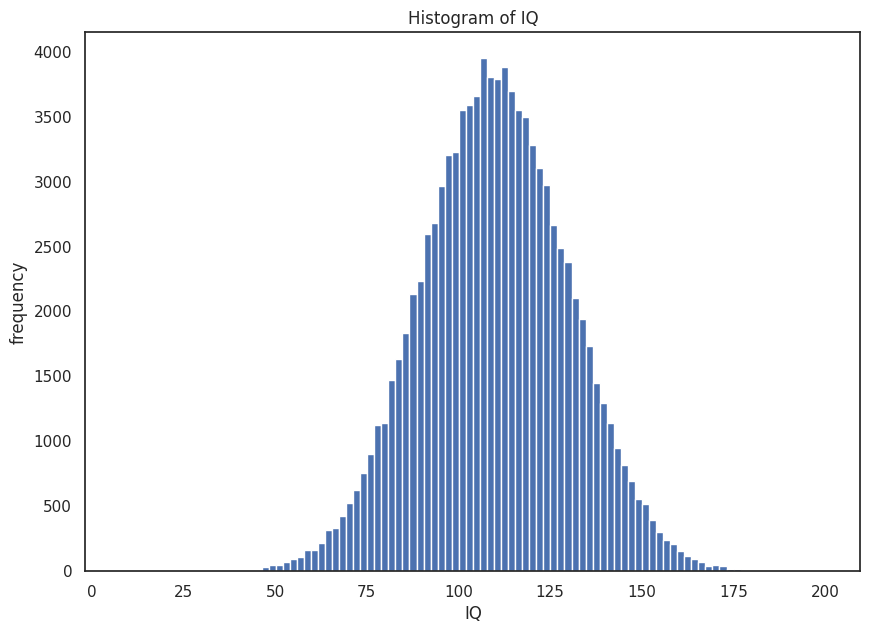

In [52]:
# parameters of normal distribution
mu, sigma = 110, 20  # mean and standard deviation
s = np.random.normal(mu, sigma, 100000)
print("mean: ", np.mean(s))
print("standart deviation: ", np.std(s))
# visualize with histogram
plt.figure(figsize = (10,7))
plt.hist(s, 100, density=False) # Changed normed to density
plt.ylabel("frequency")
plt.xlabel("IQ")
plt.title("Histogram of IQ")
plt.show()

* Как видно из гистограммы, большинство людей сосредоточено около 110, что является средним значением нашего нормального распределения.
* Однако что такое "большинство", о котором я упомянул в предыдущем предложении? Что, если я хочу узнать, какой процент людей должен иметь IQ от 80 до 140?
* Мы будем использовать z-оценку, чтобы ответить на этот вопрос.
    * z = (x - среднее) / стандартное отклонение
    * z1 = (80-110)/20 = -1.5
    * z2 = (140-110)/20 = 1.5
    * Расстояние между средним значением и 80 составляет 1.5 стандартного отклонения, а расстояние между средним значением и 140 составляет 1.5 стандартного отклонения.
    * Если вы посмотрите на таблицу z-оценок, вы увидите, что 1.5 стандартного отклонения соответствует 0.4332.
 <a href="https://ibb.co/hys6OT"><img src="https://preview.ibb.co/fYzWq8/123.png" alt="123" border="0"></a>

      * Давайте рассчитаем это с 2, потому что 1 от 80 до среднего значения, а другое от среднего значения до 140.
      * 0.4332 * 2 = 0.8664
      * 86.64% людей имеют IQ от 80 до 140.
  <a href="https://ibb.co/fhc6OT"><img src="https://preview.ibb.co/bUi2xo/hist.png" alt="hist" border="0"></a>

* Какой процент людей должен иметь IQ меньше 80?
* z = (110-80)/20 = 1.5
* Давайте посмотрим на таблицу z-оценок 0.4332. 43.32% людей имеют IQ от 80 до среднего значения (110).
* Если мы вычтем из 50% 43.32%, мы сможем найти процент людей с IQ меньше 80.
* 50-43.32 = 6.68. В результате 6.68% людей имеют IQ меньше 80.


## последнее задание

Сделать Z оценку для данного датасета

1. сформулировать гипотезы
2. посчитать z-оценку
3. посчитать p-value
4. на основе уровня значимости $\alpha$ подтвердить/опровергнуть гипотезы

In [59]:
from scipy.stats import norm

x_m = data_malignant.radius_mean
x_b = data_bening.radius_mean

mean_m = x_m.mean()
mean_b = x_b.mean()

std_m = x_m.std()
std_b = x_b.std()

n_m = len(x_m)
n_b = len(x_b)

# Z-оценка
z = (mean_m - mean_b) / np.sqrt((std_m**2 / n_m) + (std_b**2 / n_b)) #разница средних; стандартная ошибка разницы
print("Z-score:", z)

# Двусторонний p-value
p_value_z = 2 * (1 - norm.cdf(abs(z)))
print("p-value (Z-test):", p_value_z)

#Проверка
alpha = 0.05
if p_value_z < alpha:
    print("РЕЗУЛЬТАТ: отвергаем нулевую гипотезу: есть статистически значимые различия в сред. радиусе злокачеств. и доброкачеств. опухолей")
else:
    print("РЕЗУЛЬТАТ: Не отвергаем нулевую гипотезу: нет статистически значимых различий в среднем радиусе злокачеств. и доброкачеств. опухолей")

Z-score: 22.20879775846453
p-value (Z-test): 0.0
РЕЗУЛЬТАТ: отвергаем нулевую гипотезу: есть статистически значимые различия в сред. радиусе злокачеств. и доброкачеств. опухолей
